<a href="https://colab.research.google.com/github/Sheila-Otieno/Machine-learning/blob/main/Seattle_Bridge_Bicycle_counts_using_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import numpy as np


In [10]:
data = pd.read_csv('https://data.seattle.gov/resource/65db-xm6k.csv', index_col= 'date', parse_dates=True)
data.head()

,fremont_bridge,fremont_bridge_sb,fremont_bridge_nb
date,,,
2022-04-30 23:00:00,24,9,15
2022-04-30 22:00:00,40,13,27
2022-04-30 21:00:00,79,15,64
2022-04-30 20:00:00,70,33,37
2022-04-30 19:00:00,164,63,101


In [11]:
data.dropna().describe()

,fremont_bridge,fremont_bridge_sb,fremont_bridge_nb
count,1000.000000,1000.000000,1000.00000
mean,87.578000,35.311000,52.26700
std,93.876081,38.804408,57.70615
min,0.000000,0.000000,0.00000
25%,13.000000,5.000000,8.00000
50%,60.000000,24.000000,35.00000
75%,131.000000,51.000000,77.25000
max,664.000000,464.000000,425.00000


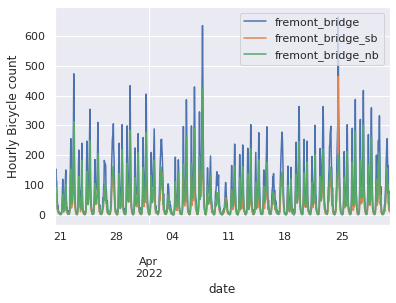

In [12]:
#visualize data
seaborn.set()
data.plot()
plt.ylabel("Hourly Bicycle count")
plt.show()

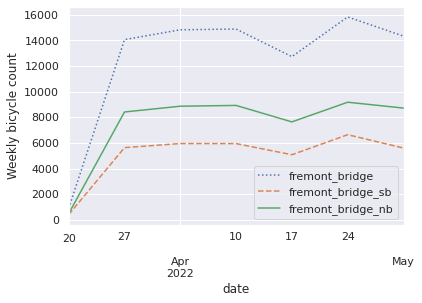

In [13]:
#weekly bicycle count
weekly = data.resample("W").sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count')
plt.show()

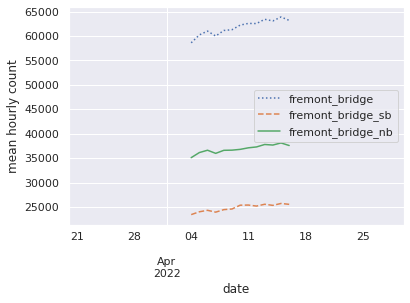

In [14]:
#rolling mean used to aggregate data
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count')
plt.show()

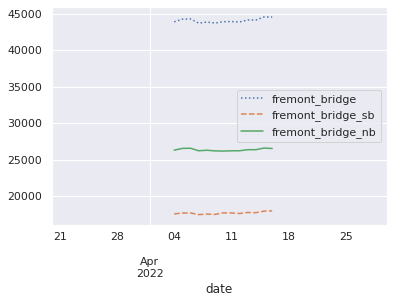

In [16]:
#gaussian window used for a smoother visualization
daily.rolling(30, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':','--', '-'])
plt.show()

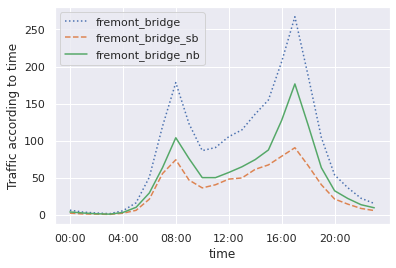

In [18]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks= hourly_ticks, style=[':', '--', '-'])
plt.ylabel("Traffic according to time")
plt.show()